##Principal component analysis PCA

In [1]:
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load the data

In [3]:

# Load data
data = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/Iteration3_2933samples_ASE+SDA+VIEW/atrium_SDA+ASE_v3_2933_samples.csv')
pd.set_option('display.max_columns', None)
#data = data.dropna(axis=0)


### Brief exploration

In the following, we will do some of the standard inspections one should do with every new dataset to get a feeling for its påroperties.

In [4]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  2933 non-null   float64
 1   typicalFacadeWindowWidth   2933 non-null   int64  
 2   groundFacadeGlazingRatio   2933 non-null   float64
 3   groundFacadeWindowWidth    2933 non-null   int64  
 4   buildingDepth              2933 non-null   int64  
 5   balconyWidth               2933 non-null   int64  
 6   atriumArea                 2933 non-null   int64  
 7   aspectRatio                2933 non-null   float64
 8   groundFloorHeight          2933 non-null   float64
 9   typicalfloorHeight         2933 non-null   float64
 10  numberLevels               2933 non-null   int64  
 11  groundSDA                  2933 non-null   float64
 12  firstSDA                   2933 non-null   float64
 13  groundASE                  2933 non-null   float

In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 0 to 2932
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  2933 non-null   float64
 1   typicalFacadeWindowWidth   2933 non-null   int64  
 2   groundFacadeGlazingRatio   2933 non-null   float64
 3   groundFacadeWindowWidth    2933 non-null   int64  
 4   buildingDepth              2933 non-null   int64  
 5   balconyWidth               2933 non-null   int64  
 6   atriumArea                 2933 non-null   int64  
 7   aspectRatio                2933 non-null   float64
 8   groundFloorHeight          2933 non-null   float64
 9   typicalfloorHeight         2933 non-null   float64
 10  numberLevels               2933 non-null   int64  
 11  groundSDA                  2933 non-null   float64
 12  firstSDA                   2933 non-null   float64
 13  groundASE                  2933 non-null   float

In [6]:
# Print the first 5 rows
data.head()

,typicalFacadeGlazingRatio,typicalFacadeWindowWidth,groundFacadeGlazingRatio,groundFacadeWindowWidth,buildingDepth,balconyWidth,atriumArea,aspectRatio,groundFloorHeight,typicalfloorHeight,numberLevels,groundSDA,firstSDA,groundASE,firstASE,groundViewPercentage,firstViewPercentage
0,0.800,4,0.800,4,21,3,2300,1.300,5.000,3.000,8,100.000,37.000,21.800,12.200,77.200,77.200
1,0.900,4,0.800,3,38,2,1300,1.500,4.500,2.600,7,49.800,23.100,13.700,8.000,88.100,78.200
2,0.800,3,0.800,4,34,4,2100,1.400,5.600,2.800,5,80.500,23.900,19.600,8.200,77.900,78.300
3,0.700,2,0.800,2,16,5,1200,0.700,5.000,2.600,10,100.000,36.000,28.100,10.800,69.100,77.700
4,0.700,2,0.800,2,32,4,3700,1.300,5.000,2.800,6,71.600,23.700,17.700,6.900,68.200,78.200


In [7]:
# Descriptive statistics
data.describe()

,typicalFacadeGlazingRatio,typicalFacadeWindowWidth,groundFacadeGlazingRatio,groundFacadeWindowWidth,buildingDepth,balconyWidth,atriumArea,aspectRatio,groundFloorHeight,typicalfloorHeight,numberLevels,groundSDA,firstSDA,groundASE,firstASE,groundViewPercentage,firstViewPercentage
count,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000
mean,0.801,2.996,0.801,3.007,27.454,3.508,2454.211,1.005,4.505,2.749,5.424,75.394,34.816,20.720,11.848,78.077,78.133
std,0.071,0.812,0.071,0.819,7.495,1.712,857.302,0.291,0.857,0.150,2.875,22.962,12.818,7.457,4.309,6.762,6.799
min,0.700,2.000,0.700,2.000,15.000,1.000,1000.000,0.500,3.000,2.500,1.000,26.100,15.200,5.600,5.000,65.100,65.100
25%,0.800,2.000,0.800,2.000,21.000,2.000,1700.000,0.800,3.800,2.600,3.000,54.600,25.800,15.500,8.800,74.800,74.900
50%,0.800,3.000,0.800,3.000,27.000,4.000,2400.000,1.000,4.500,2.800,5.000,77.800,31.700,19.300,10.900,78.000,78.000
75%,0.900,4.000,0.900,4.000,34.000,5.000,3200.000,1.300,5.300,2.900,8.000,99.800,40.100,24.600,13.900,84.500,85.000
max,0.900,4.000,0.900,4.000,40.000,6.000,3900.000,1.500,6.000,3.000,10.000,100.000,100.000,64.400,34.400,90.300,90.500


In [ ]:
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(data, hue='aspectRatio')

Output hidden; open in https://colab.research.google.com to view.

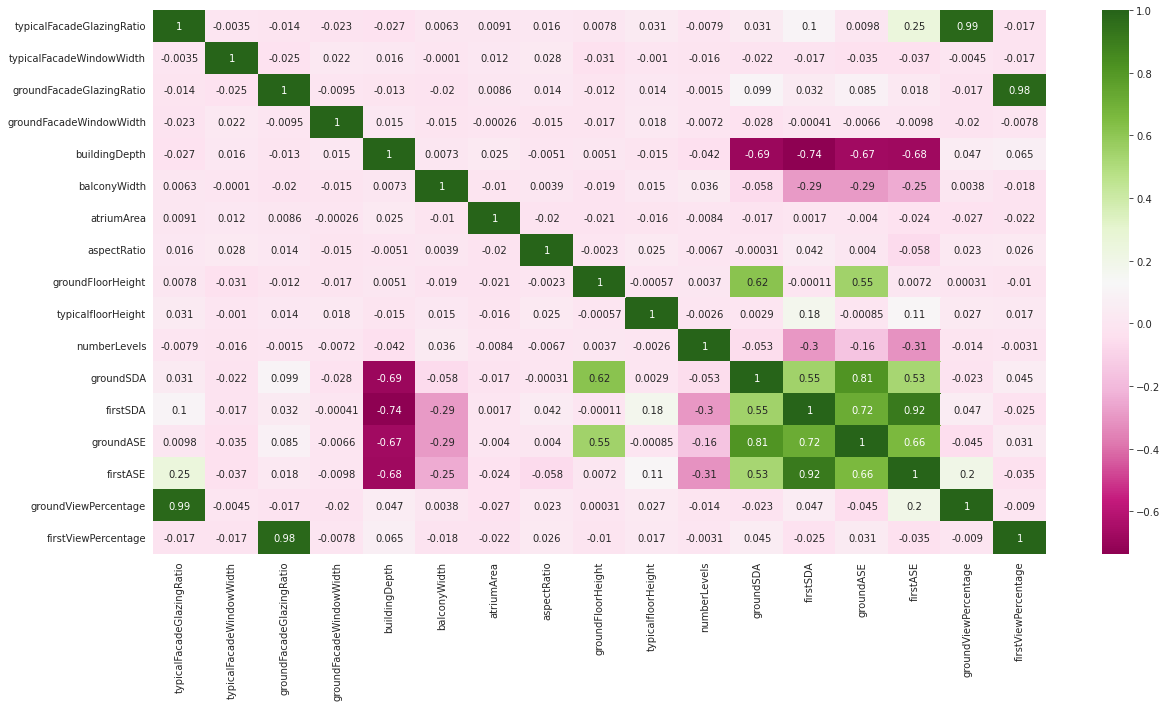

In [9]:
# And lastly, a correlation plot
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="PiYG", ax=ax)

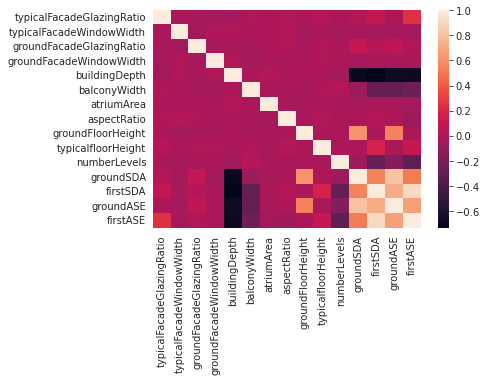

In [ ]:
# And lastly, a correlation plot
sns.heatmap(data.corr())

### Preprocessing

In [16]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
#data_num = data.drop(columns = 'species')
data_num = data

Since in PCA exercises the features used can be of different scale (eg. meter & kilometer) or dispolay a very different variance, it is common practice in ML workflow to normalize features. By doing so, we prevent features with high variance or scale ranges to dominate.

We here apply a standard scaler, where we substract for every feature its mean, and thyen divide by its standard deviation.

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

In [19]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=data_num.columns).describe()

,typicalFacadeGlazingRatio,typicalFacadeWindowWidth,groundFacadeGlazingRatio,groundFacadeWindowWidth,buildingDepth,balconyWidth,atriumArea,aspectRatio,groundFloorHeight,typicalfloorHeight,numberLevels,groundSDA,firstSDA,groundASE,firstASE,groundViewPercentage,firstViewPercentage
count,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000
mean,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.416,-1.228,-1.420,-1.230,-1.662,-1.465,-1.697,-1.733,-1.757,-1.656,-1.539,-2.147,-1.531,-2.028,-1.590,-1.920,-1.917
25%,-0.009,-1.228,-0.018,-1.230,-0.861,-0.881,-0.880,-0.703,-0.823,-0.991,-0.843,-0.906,-0.703,-0.700,-0.708,-0.485,-0.476
50%,-0.009,0.005,-0.018,-0.009,-0.061,0.288,-0.063,-0.016,-0.006,0.339,-0.148,0.105,-0.243,-0.190,-0.220,-0.011,-0.019
75%,1.398,1.237,1.383,1.212,0.874,0.872,0.870,1.014,0.928,1.003,0.896,1.063,0.412,0.520,0.476,0.950,1.010
max,1.398,1.237,1.383,1.212,1.674,1.456,1.687,1.701,1.745,1.668,1.592,1.072,5.086,5.859,5.235,1.808,1.819


### Executing PCA

In [20]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [21]:
# Fit the model
model.fit(data_scaled)

PCA()

In [22]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)
data_num_reduced_df = pd.DataFrame(data_reduced)
#data_num_reduced_df["species"] = data["species"]

print(data_num_reduced_df)

         0      1      2      3      4      5      6      7      8      9   \
0     1.036  0.224  0.255 -0.394 -0.971 -1.983 -0.666 -1.327 -0.044 -0.926   
1    -2.079 -1.752 -1.211 -0.719  0.567 -1.719  0.831  0.401  2.068 -0.560   
2    -0.874  0.310 -0.016 -1.371  0.309 -1.797 -0.755  0.050 -0.068 -0.242   
3     1.076  2.070  1.303 -1.373 -1.950  1.926 -0.040  0.950  1.145  0.412   
4    -1.486  1.841  0.915 -0.583 -0.092  0.203  0.954  1.040 -1.766 -1.123   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2928 -0.477  0.792  2.907  0.022  0.211  1.081  0.142 -2.620  0.647 -0.192   
2929 -0.387 -0.004  0.076 -0.614 -1.136  0.659  1.119  0.510  0.334  1.159   
2930  0.627  1.159 -1.512 -0.499 -0.777 -0.060 -0.694  0.336  1.420 -0.041   
2931 -1.400 -1.768 -1.231  0.406  0.218 -0.214 -0.306 -1.207  0.187 -1.957   
2932 -1.497 -1.510  1.484  0.914 -1.961  2.434  0.468  0.721  0.530  0.695   

         10     11     12     13     14     15     16  
0     0

### Inspecting Results

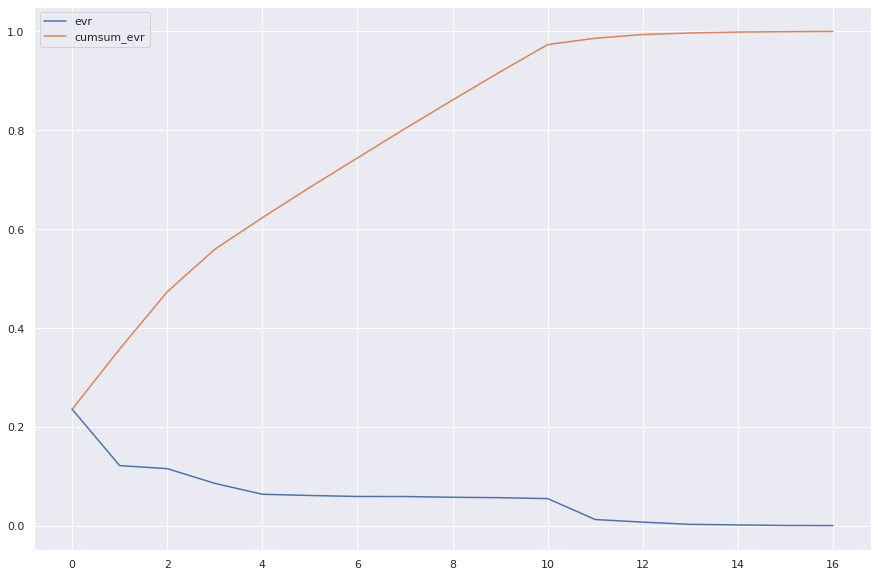

In [23]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
print(model.explained_variance_ratio_)

[0.26681252 0.10117022 0.07294238 0.06973386 0.06911064 0.06848221
 0.06704325 0.06653614 0.06426964 0.06306702 0.06241256 0.01435299
 0.00850581 0.00345249 0.00210828]


PLOTTING ALL THE PCS

In [24]:
def myplot_df(df,coeff, scale, labels = None):
    df["xs"] = df[df.columns[0]]
    df["ys"] = df[df.columns[1]]
    #print(df)
    
    n = coeff.shape[0]
    
    
    if scale == True:
        scalex = 1.0/(df["xs"].max() - df["xs"].min())
        scaley = 1.0/(df["ys"].max() - df["ys"].min())

        df["xs"] = scalex *  df["xs"] 
        df["ys"] = scaley * df["ys"] 
    
    g = sns.scatterplot(x='xs',y='ys', data=df)
    g.legend(title = "PCA", loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon = False)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data_num.columns[i], color = 'black', ha = 'center', va = 'center', alpha = 0.9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')

No handles with labels found to put in legend.


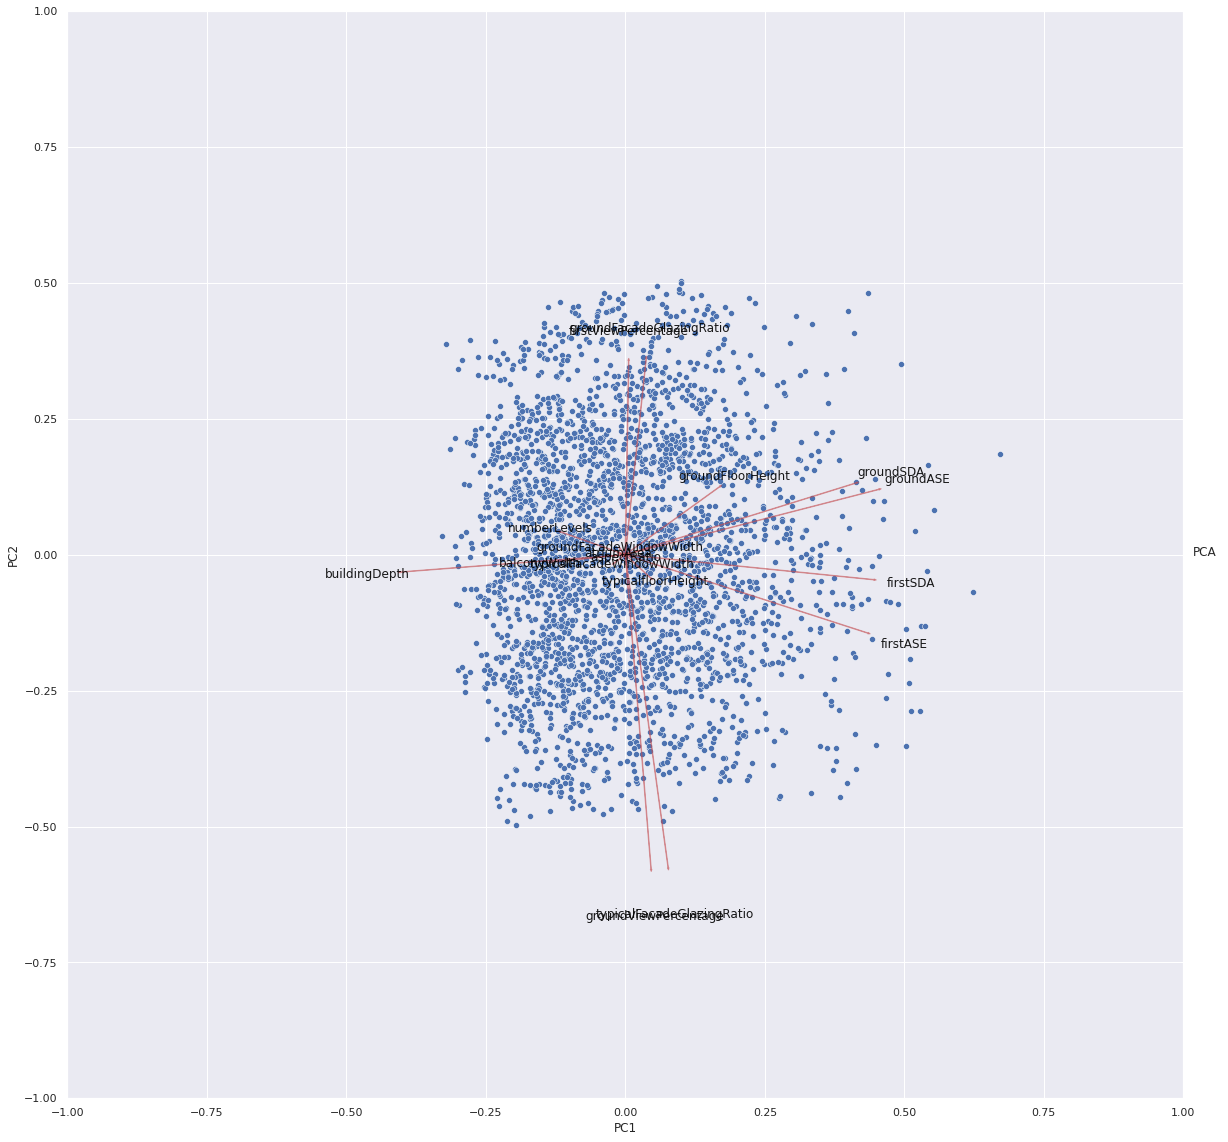

In [25]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
fig = plt.gcf()

fig.set_size_inches(20, 20)
myplot_df(data_num_reduced_df, np.transpose(model.components_[0:2, :]), True)


The important features are the ones that influence more the components and thus, have a large absolute value/score on the component.

In [26]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data_num.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

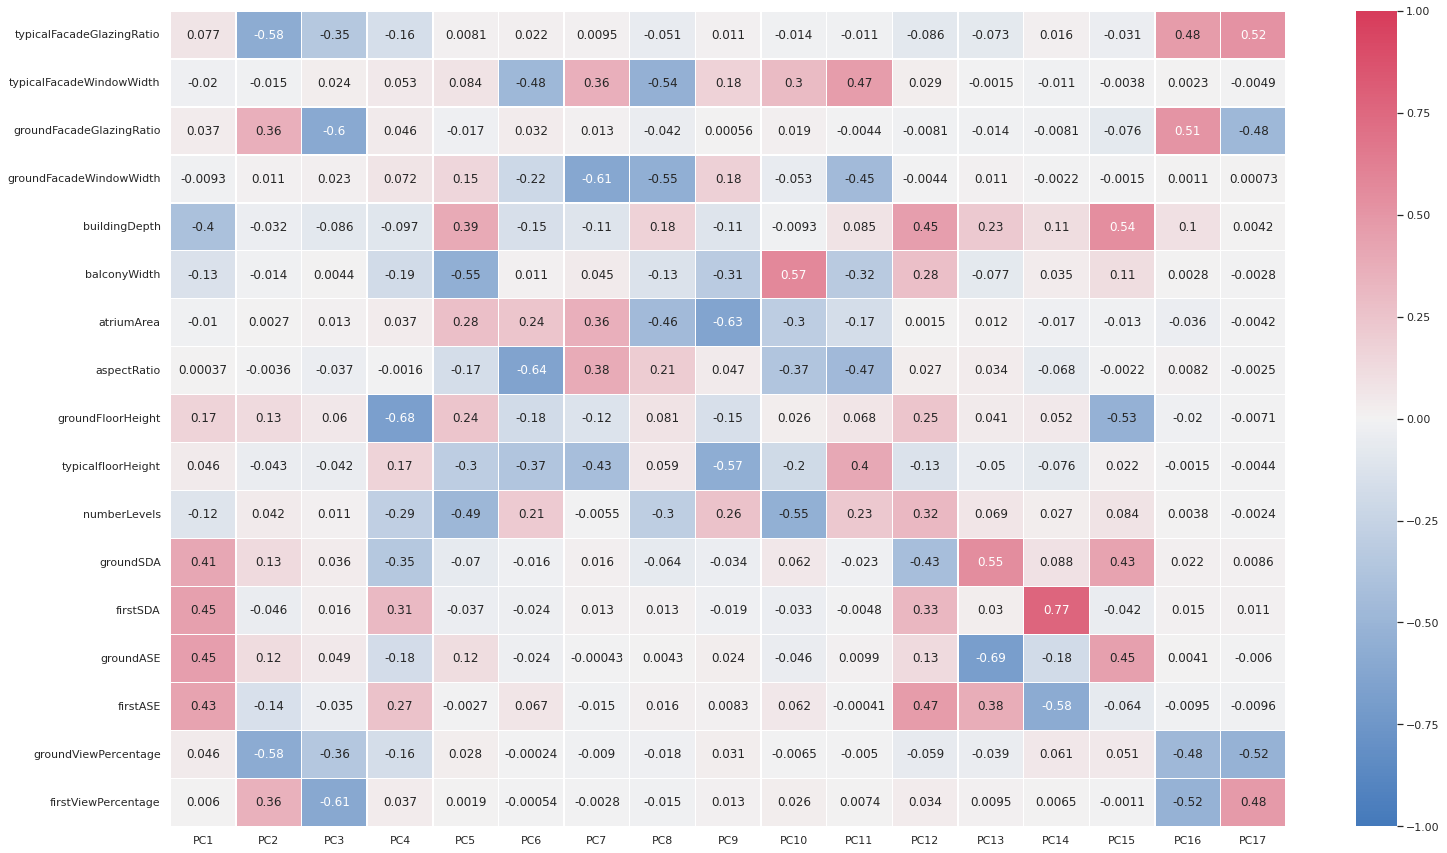

In [27]:
#cmap="viridis"
#cmap="crest"
#cmap="mako"
#cmap=pal
pal = sns.diverging_palette(250, 5, as_cmap=True)
fig, ax = plt.subplots(figsize=(25,15))
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, cmap=pal, vmin=-1, vmax=1, annot=True)

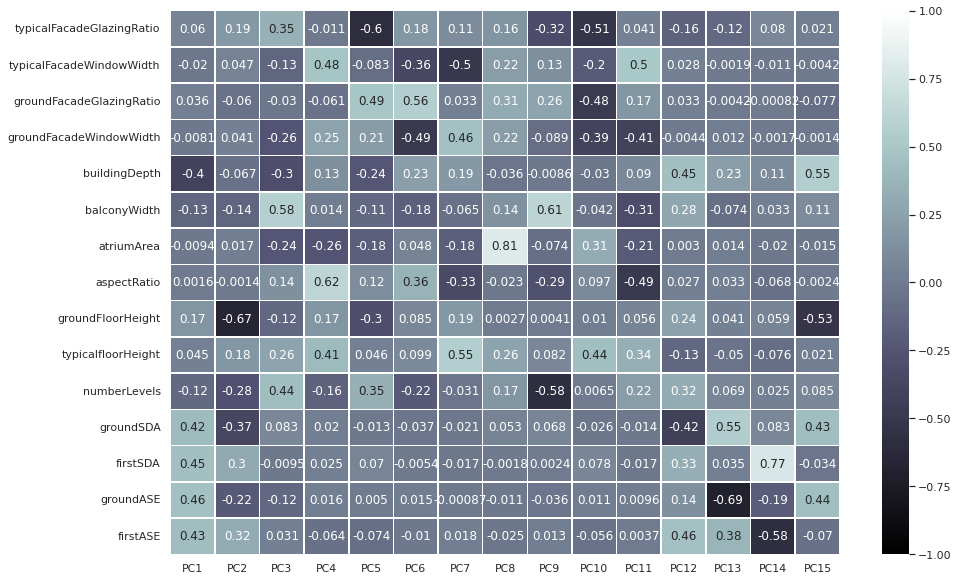

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [ ]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data_num.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

       0                          1
0    PC0                  groundASE
1    PC1          groundFloorHeight
2    PC2               balconyWidth
3    PC3                aspectRatio
4    PC4  typicalFacadeGlazingRatio
5    PC5   groundFacadeGlazingRatio
6    PC6         typicalfloorHeight
7    PC7                 atriumArea
8    PC8               balconyWidth
9    PC9  typicalFacadeGlazingRatio
10  PC10   typicalFacadeWindowWidth
11  PC11                   firstASE
12  PC12                  groundASE
13  PC13                   firstSDA
14  PC14              buildingDepth
